In [1]:
import numpy as np
import pandas as pd
import xarray as xr

## Create a sample pandas dataframe

In [4]:
dates = pd.date_range('2010-1-1', '2021-1-1', freq='MS')
dates

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01'],
              dtype='datetime64[ns]', length=133, freq='MS')

In [6]:
df = pd.DataFrame(data=np.random.randn(len(dates), 2), index=dates, columns=['first', 'second'])
df

,first,second
2010-01-01,-0.821870,1.095181
2010-02-01,1.954072,0.454079
2010-03-01,-0.214268,-0.576107
2010-04-01,-2.354233,-1.240542
2010-05-01,1.454897,-0.872694
...,...,...
2020-09-01,-0.800609,-0.204892
2020-10-01,-0.058514,-0.853252
2020-11-01,-0.122424,0.540848
2020-12-01,-1.082644,1.169341


## Indexing in pandas

Learn about the details of [pandas indexing here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

The short answer is to use square brackets like numpy indexing, or use `.loc[]` and `.iloc[]`. 

*Note square brackets after loc and iloc*

In [24]:
df['second']

2010-01-01    1.095181
2010-02-01    0.454079
2010-03-01   -0.576107
2010-04-01   -1.240542
2010-05-01   -0.872694
                ...   
2020-09-01   -0.204892
2020-10-01   -0.853252
2020-11-01    0.540848
2020-12-01    1.169341
2021-01-01   -0.698082
Freq: MS, Name: second, Length: 133, dtype: float64

In [50]:
df.loc['2010']

,first,second
2010-01-01,-0.821870,1.095181
2010-02-01,1.954072,0.454079
2010-03-01,-0.214268,-0.576107
2010-04-01,-2.354233,-1.240542
2010-05-01,1.454897,-0.872694
2010-06-01,-0.773421,-0.679461
2010-07-01,0.719970,0.182201
2010-08-01,0.284795,-0.485269
2010-09-01,0.426774,0.399242
2010-10-01,-1.515182,0.091370


In [52]:
df.iloc[50:60]['second'].mean()

-0.028691614106552098

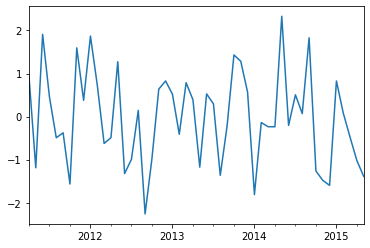

In [56]:
df['second'].loc['2011-04':'2015-05'].plot()

## Create a sample xarray DataArray

In [25]:
da = xr.DataArray(np.random.rand(len(dates), 21, 51, 101), 
                  dims=('t', 'z', 'y', 'x'), 
                  coords={'t':dates,
                          'z':np.linspace(-10, 0, 21),
                          'y':np.linspace(0, 1, 51),
                          'x':np.linspace(0, 2, 101)})
da

<xarray.DataArray (t: 133, z: 21, y: 51, x: 101)>
array([[[[0.24779867, 0.6897068 , 0.23106358, ..., 0.73669748,
          0.49154851, 0.46530615],
         [0.89426242, 0.32604366, 0.07594244, ..., 0.19424345,
          0.67685064, 0.04046582],
         [0.26325397, 0.97019931, 0.76499634, ..., 0.84557701,
          0.46753186, 0.96707417],
         ...,
         [0.9261291 , 0.64861383, 0.01836637, ..., 0.90746793,
          0.51331541, 0.32908555],
         [0.88545392, 0.30666368, 0.15007743, ..., 0.1612342 ,
          0.19044474, 0.1161157 ],
         [0.77154064, 0.02407131, 0.09484361, ..., 0.25373695,
          0.06348909, 0.18758448]],

        [[0.41452682, 0.38710524, 0.44095781, ..., 0.95409228,
          0.12534031, 0.76795901],
         [0.41729433, 0.89971666, 0.43841536, ..., 0.88664819,
          0.61163293, 0.70528684],
         [0.25571072, 0.26427685, 0.03149266, ..., 0.75775971,
          0.28810968, 0.06745022],
         ...,
         [0.5879155 , 0.57975098, 0.03413006, ..., 0.44539461,
          0.56202248, 0.43076769],
         [0.32916989, 0.94861744, 0.1245052 , ..., 0.1836632 ,
          0.76546313, 0.82833254],
         [0.22489324, 0.8768045 , 0.47463218, ..., 0.54058632,
          0.47729702, 0.45001261]],

        [[0.6614431 , 0.27078353, 0.49290687, ..., 0.78589639,
          0.62163333, 0.72356076],
         [0.01951274, 0.62445438, 0.16782806, ..., 0.94594386,
          0.0761101 , 0.15561016],
         [0.85981316, 0.84575969, 0.77013053, ..., 0.42091502,
          0.27275105, 0.63429479],
         ...,
         [0.12606894, 0.48845253, 0.80113946, ..., 0.97912451,
          0.7699895 , 0.37689763],
         [0.79328583, 0.97786751, 0.18151859, ..., 0.96889655,
          0.29960312, 0.31158673],
         [0.50176496, 0.14095298, 0.13453655, ..., 0.03135679,
          0.02919322, 0.11633397]],

        ...,

        [[0.99979697, 0.35669802, 0.99631367, ..., 0.13234636,
          0.73151055, 0.95376125],
         [0.97857443, 0.40870452, 0.70923097, ..., 0.47967292,
          0.65212084, 0.18989667],
         [0.088117  , 0.17954341, 0.49490893, ..., 0.43319777,
          0.14554794, 0.25624287],
         ...,
         [0.18920071, 0.6193688 , 0.89197385, ..., 0.02904434,
          0.19081315, 0.0497708 ],
         [0.75394391, 0.8158777 , 0.51309659, ..., 0.84490312,
          0.07846413, 0.32389937],
         [0.35283075, 0.11154957, 0.07484086, ..., 0.05790174,
          0.36726651, 0.92902468]],

        [[0.59677514, 0.03272018, 0.69412637, ..., 0.10719954,
          0.8561461 , 0.96241397],
         [0.22104262, 0.03970808, 0.13059151, ..., 0.34935999,
          0.50538991, 0.23592502],
         [0.38575051, 0.60350894, 0.9878671 , ..., 0.38861444,
          0.38614422, 0.64150543],
         ...,
         [0.59841571, 0.01477356, 0.71739734, ..., 0.16652193,
          0.68598131, 0.59540167],
         [0.63182517, 0.29056319, 0.85568061, ..., 0.9091669 ,
          0.83221115, 0.11109766],
         [0.04029939, 0.15235129, 0.71181552, ..., 0.95323668,
          0.54915396, 0.30719061]],

        [[0.93126074, 0.89908772, 0.26831406, ..., 0.3105601 ,
          0.4282168 , 0.06912061],
         [0.09497534, 0.46825784, 0.23038699, ..., 0.60768421,
          0.16583477, 0.36629059],
         [0.69476368, 0.25616225, 0.49502429, ..., 0.75624661,
          0.43997851, 0.71351459],
         ...,
         [0.14394619, 0.93352989, 0.61440396, ..., 0.61704582,
          0.61089697, 0.82871524],
         [0.72696493, 0.75842336, 0.58564158, ..., 0.93041361,
          0.18699222, 0.74781536],
         [0.35211749, 0.02967357, 0.75483691, ..., 0.86065259,
          0.7621391 , 0.17970764]]],


       [[[0.59035612, 0.59534824, 0.18900911, ..., 0.47783886,
          0.05553614, 0.90765399],
         [0.75401797, 0.05720831, 0.42004406, ..., 0.60921005,
          0.93389727, 0.4270323 ],
         [0.22576289, 0.50330024, 0.00386275, ..., 0.46101396,
          0.54157726, 0.42169614],
         ...,
  

## Indexing in xarray

Look here to find out more about [xarray indexing](https://xarray.pydata.org/en/stable/indexing.html)

In [33]:
da.sel(t=slice('2011', '2015'), z=slice(-7, -3)).isel(x=40, y=slice(10, 21))

<xarray.DataArray (t: 60, z: 9, y: 11)>
array([[[1.65762500e-01, 6.62975383e-01, 5.94886127e-01, ...,
         5.40814405e-02, 5.87360829e-02, 7.79705125e-01],
        [9.57627422e-01, 8.54854027e-01, 3.84566725e-01, ...,
         1.79699147e-01, 8.66700127e-01, 1.74727983e-01],
        [9.10173379e-01, 8.69828914e-01, 7.69580565e-02, ...,
         4.03126219e-01, 9.71456293e-01, 6.00289285e-01],
        ...,
        [2.78087022e-01, 4.38475797e-01, 6.44300532e-01, ...,
         3.32590648e-01, 5.51607449e-02, 7.25231616e-01],
        [2.36989776e-01, 3.57446860e-01, 1.06017932e-01, ...,
         4.68426680e-01, 8.31189654e-01, 1.91472421e-01],
        [1.80604183e-01, 3.87066379e-01, 3.61100939e-01, ...,
         5.15411377e-01, 5.69364685e-05, 6.44410664e-01]],

       [[1.75936864e-01, 8.49250683e-01, 7.33054536e-01, ...,
         6.30308336e-01, 4.87297976e-03, 4.36326571e-01],
        [6.70004545e-01, 4.62248526e-01, 5.04850181e-04, ...,
         3.12954224e-01, 8.48461022e-02, 2.82246979e-02],
        [6.61594075e-02, 4.91033253e-01, 5.71937150e-01, ...,
         2.07004612e-01, 4.14297152e-01, 5.05622553e-01],
        ...,
        [8.23707912e-01, 5.93135849e-01, 5.92417261e-01, ...,
         3.91742887e-01, 9.27185840e-01, 4.75022152e-01],
        [2.34921677e-01, 2.63039448e-01, 2.70738883e-01, ...,
         2.35011874e-01, 5.23723932e-01, 1.18103167e-01],
        [8.87821498e-01, 5.32220263e-01, 6.96294811e-01, ...,
         7.84736142e-01, 8.61821548e-01, 9.02323985e-01]],

       [[7.15982286e-01, 9.66286358e-03, 9.45240670e-01, ...,
         8.87260953e-01, 9.67458027e-01, 2.71875068e-02],
        [2.12822669e-01, 9.96770974e-01, 5.77684126e-01, ...,
         3.70463772e-02, 9.23628987e-01, 7.66109290e-01],
        [1.64766989e-01, 1.86233533e-01, 6.21082149e-01, ...,
         6.63983505e-01, 9.23057627e-01, 2.06312850e-01],
        ...,
        [8.40429199e-01, 6.59729304e-01, 2.29964756e-01, ...,
         3.53103829e-02, 9.00977389e-01, 6.32643329e-01],
        [2.54293871e-01, 9.24935934e-01, 7.62661404e-02, ...,
         1.18583310e-01, 1.87347065e-01, 1.42268409e-01],
        [2.70813909e-01, 3.05544908e-01, 6.33513260e-01, ...,
         6.72226598e-01, 1.28634269e-01, 5.56583047e-01]],

       ...,

       [[6.48471321e-01, 8.97093982e-01, 6.86324884e-01, ...,
         7.11005765e-01, 7.25814771e-01, 1.57745563e-01],
        [2.05841194e-03, 6.53932905e-01, 3.90377624e-01, ...,
         6.04719161e-01, 5.29190199e-01, 6.59146843e-02],
        [3.44181827e-01, 5.07055180e-02, 7.03937610e-01, ...,
         7.72952014e-01, 9.24000336e-01, 9.01398121e-01],
        ...,
        [7.60455713e-01, 2.30327839e-01, 6.38484132e-01, ...,
         4.96760019e-01, 7.35151635e-01, 6.46231192e-02],
        [7.70362689e-01, 7.18641249e-01, 9.70011349e-01, ...,
         4.06181776e-01, 7.43095970e-01, 1.44571226e-02],
        [6.86403689e-01, 5.20076762e-01, 4.46529133e-02, ...,
         8.62629573e-01, 9.45767658e-01, 4.21991888e-01]],

       [[2.67791879e-01, 9.41103486e-01, 5.71317228e-01, ...,
         3.91006754e-01, 1.54243219e-01, 2.07738636e-02],
        [1.41877954e-01, 6.85975700e-02, 9.73256756e-01, ...,
         2.35548592e-01, 7.13496101e-01, 7.07958165e-01],
        [7.59475017e-01, 7.57557265e-02, 5.34249224e-02, ...,
         7.70177999e-01, 2.40641729e-01, 6.64525202e-01],
        ...,
        [8.76464656e-01, 4.63904605e-03, 6.23392634e-01, ...,
         6.38682356e-01, 3.54894785e-02, 1.13529501e-01],
        [4.78320684e-01, 3.42809184e-02, 7.62347352e-01, ...,
         3.57672749e-01, 1.28689745e-01, 9.53604876e-01],
        [9.94245206e-01, 6.23005646e-01, 9.44999508e-01, ...,
         2.78485949e-01, 6.49224861e-01, 1.73704683e-01]],

       [[9.20801595e-01, 8.77665387e-01, 3.94960918e-01, ...,
         4.43592636e-01, 3.31183224e-01, 6.86007195e-01],
        [8.59095229e-01, 8.40971341e-01, 5.55603390e-01, ...,
         3.27502746e-01, 6.89963076e-01, 2.11322403e-01],
        [7.95462239e-01, 4.95805

In [43]:
surface = da.sel(t='2015-6-01').isel(z=-1)
bottom = da.sel(t='2015-6-01').isel(z=0)

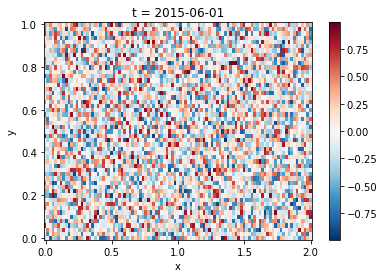

In [46]:
(surface - bottom).plot()

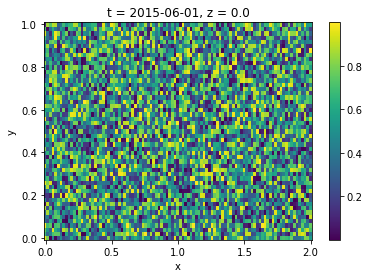

In [47]:
surface.plot()

In [49]:
da[50, 20, 10:30, 20:25].values

array([[0.0534619 , 0.18774983, 0.44393669, 0.60137779, 0.43621556],
       [0.78144695, 0.51403025, 0.31037892, 0.3634059 , 0.59254434],
       [0.30859259, 0.30711739, 0.65959797, 0.92731259, 0.12823603],
       [0.02213597, 0.73637554, 0.67813871, 0.1912675 , 0.56714038],
       [0.24189135, 0.12487291, 0.36059856, 0.22584486, 0.69355126],
       [0.05086578, 0.14473691, 0.42150661, 0.55430844, 0.20846541],
       [0.32226672, 0.95903363, 0.0487576 , 0.90505106, 0.46952363],
       [0.82707071, 0.09152598, 0.47308713, 0.49961887, 0.37147145],
       [0.20586756, 0.66155289, 0.09661434, 0.84164581, 0.80663557],
       [0.24246024, 0.50935766, 0.69664015, 0.7873767 , 0.00745144],
       [0.43417941, 0.68650684, 0.56155646, 0.74484193, 0.6648576 ],
       [0.61231214, 0.08615719, 0.89284592, 0.43639443, 0.34541139],
       [0.77958617, 0.3170692 , 0.31367273, 0.57414058, 0.1707799 ],
       [0.43816444, 0.1741728 , 0.14448959, 0.06719183, 0.03680151],
       [0.69613004, 0.09381546, 0.